In [35]:
from methods import *
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn.manifold as manifold
import numpy as np

matplotlib.rcParams['figure.dpi'] = 200

In [ ]:
BASENAMES = basenames()
GENERATE_POS_FILES = True

In [23]:
if GENERATE_POS_FILES:
    for base in BASENAMES:
        base_pos_tags = label_pos(get_decimated_name(base))
        with open(f'POS_Distributions/{base}_pos.json', 'w') as f:
            json.dump(base_pos_tags, f)

In [24]:
pos_tags = ['``', '#', '$', "''", '(', ')', ',', '.', ':', 'CC', 'CD', 'DT', 'EX', 
            'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 
            'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 
            'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 
            'WP$', 'WRB']

In [25]:
def get_frequencies(base):
    with open(f'POS_Distributions/{base}_pos.json', 'r') as f:
        data = json.load(f)
    for tag in pos_tags:
        if tag not in data.keys():
            data[tag] = 0
    num_tokens = sum(data.values())
    for key, val in data.items():
        data[key] = val / num_tokens
    sorted_data = {pos: data[pos] for pos in pos_tags}
    return list(sorted_data.values())

In [26]:
pos_frequencies = []
for base in BASENAMES:
    pos_frequencies.append(get_frequencies(base))

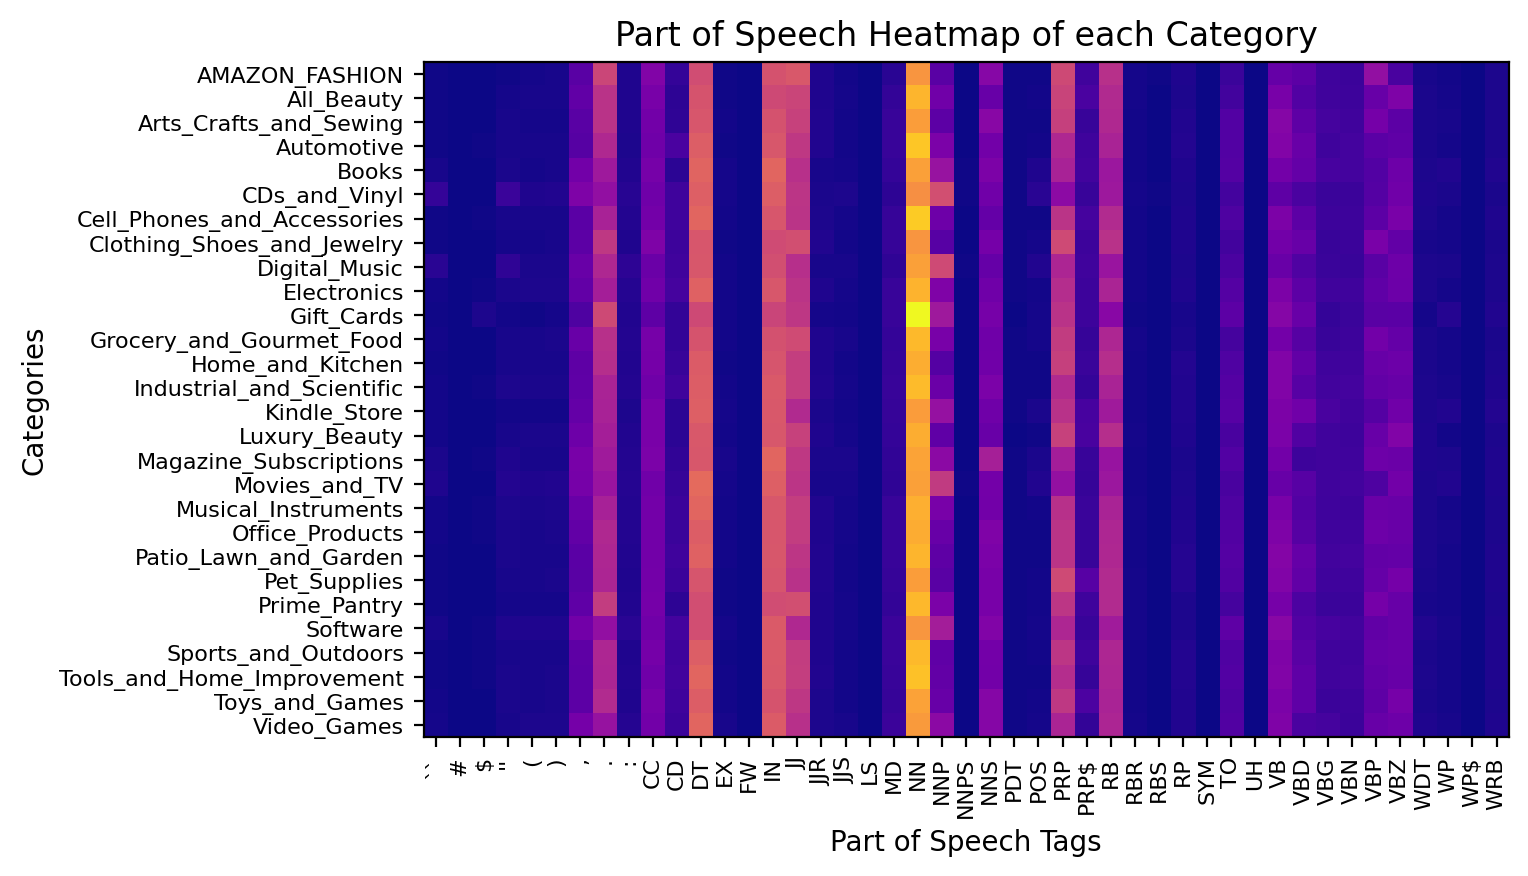

In [41]:
SAVE_IMAGE = True
plt.figure(figsize=(7, 6))
plt.imshow(pos_frequencies, cmap='plasma', interpolation='nearest')
plt.title("Part of Speech Heatmap of each Category")
plt.xlabel("Part of Speech Tags")
plt.xticks([i for i in range(len(pos_tags))], pos_tags, rotation=90, fontsize=8)
plt.yticks([i for i in range(len(BASENAMES))], [base[:-2] for base in BASENAMES], fontsize=8)
plt.ylabel("Categories")
if SAVE_IMAGE: plt.savefig('pos-heatmap.png', dpi=600, bbox_inches='tight')
plt.show()

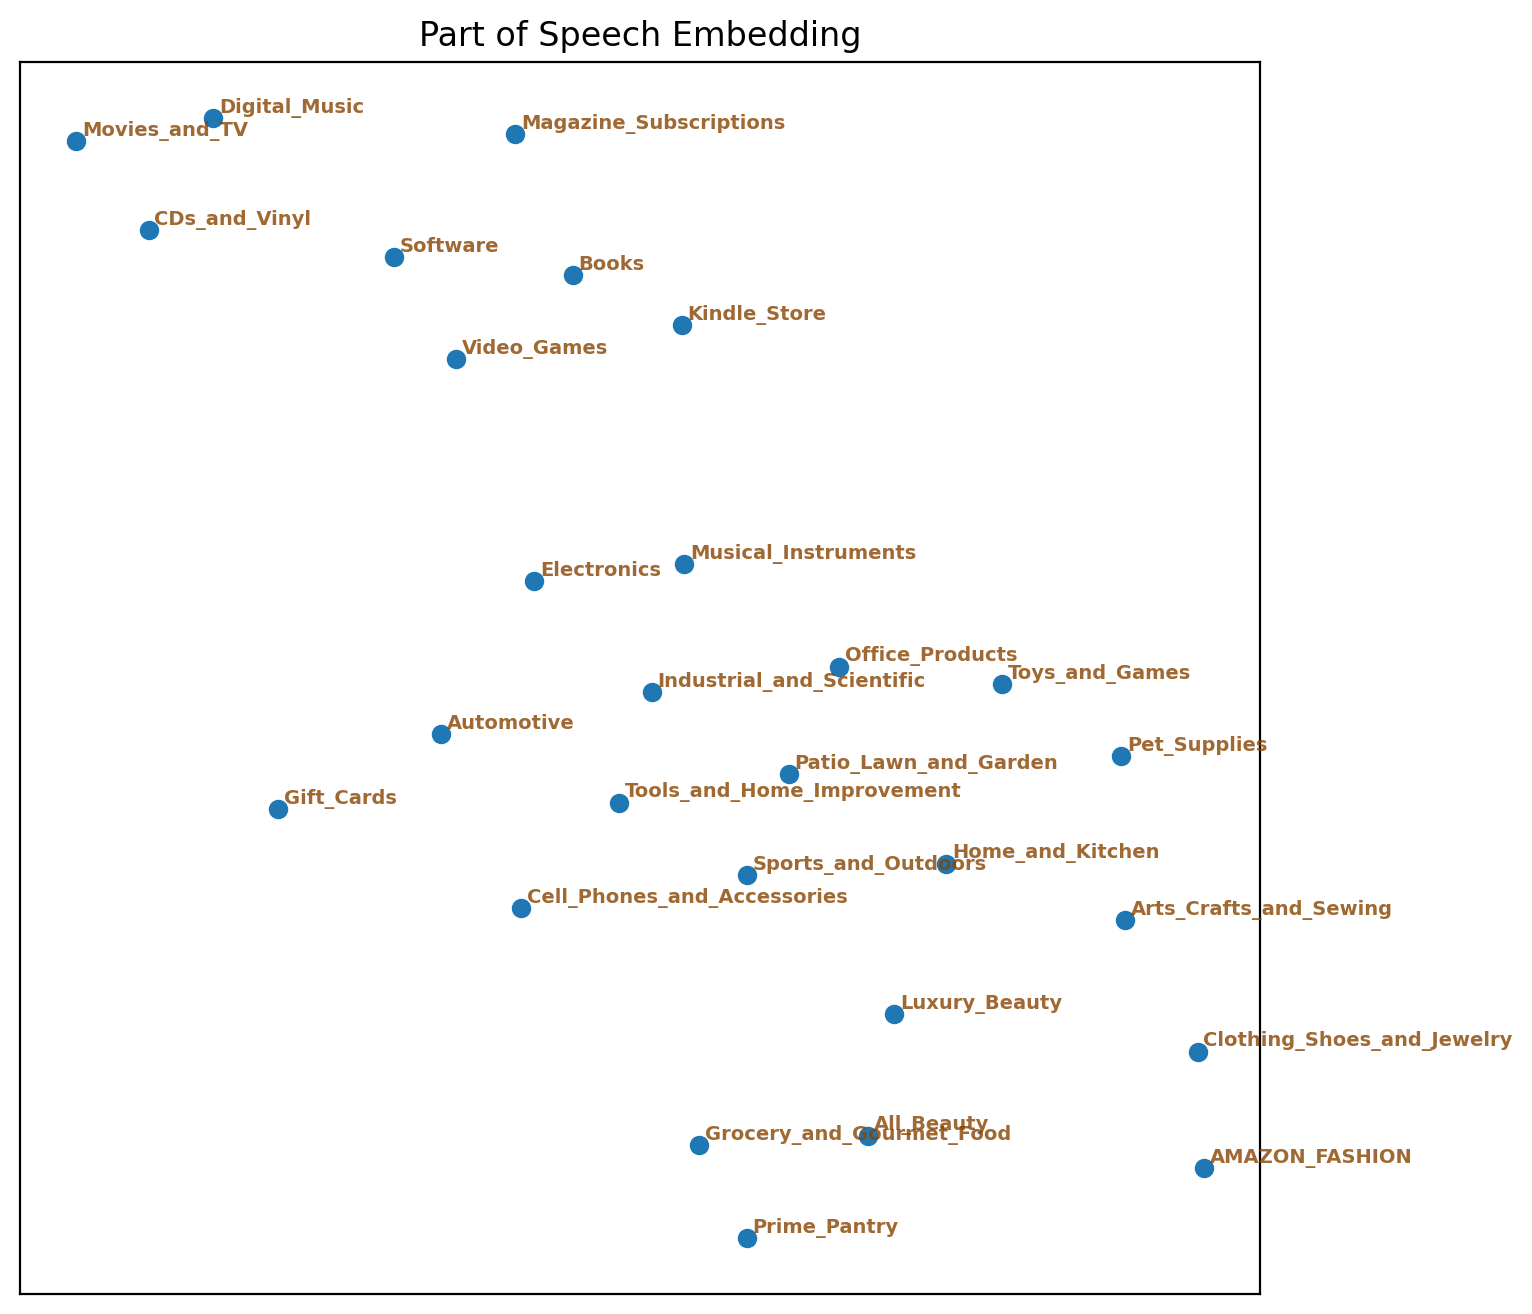

In [42]:
SAVE_IMAGE = False
embedder = manifold.TSNE(n_components=2,random_state=1809,perplexity=10)
feature_embedding = embedder.fit_transform(np.array(pos_frequencies))

plt.figure().set_size_inches((8,8)) #type:ignore
plt.title(f"Part of Speech Embedding")
plot_x = feature_embedding[:,0]
plot_y = feature_embedding[:,1]
for i, moniker in enumerate(BASENAMES):
    plt.annotate(moniker.rstrip('_5'),(plot_x[i],plot_y[i]),
                  xytext=(0.3,0.3),textcoords='offset fontsize',
                  color='#840',fontsize=7,fontweight='bold',alpha=0.80)
plt.scatter(plot_x,plot_y,marker='o')
plt.xticks([])
plt.yticks([])
if SAVE_IMAGE: plt.savefig('pos-embedding.png', dpi=600)
plt.show()